1)  A decision tree works by starting at a top node (root) then spliting into different branches depending on the given conditions until it reaches a stopping criteria. Practical applications of this in the real world can been for categorical probelms such as does a patient that needs medical care have x condition. The difference between a classicification decision tree and MLR is that MLR predict a continous variables ie numbers whereas decision trees predict a categorical variable such as a yes or no. Furthermore, trees are logic and rule based as it splits into a path depending on the nodes condition while MLR fits a linear equation to the line. 

2a) A scenario where this metric is useful is for weather reporting perdicting sunny or rainy days. This is because it balances the true positives and negatives for being sunny and there is an equal cost for a false positive. In this case the accurateness of the prediction matters most to the user and if there is an error it does not lead to massive consequence.
b) A scenario where sensitivity matters is for when we are screening for life threatening diseases as we care about missing postive cases and minimzing false negatives. High sensitivity makes sure that everyone with the disease will be flagged
c) A scenario where specificity matters is fraud detection in banking systems. False positives can be annoy for customers and the system should only flage extremely suspicious transactions.audio 
d) A scenario where precision matters are email filters. The cost of a false positive is extremely high as it can be as it can result in the user missing an important email. Furthermore, the filter missing a spam email or two is not that bad as the user can just delete the email themselves.

ChatGPT sumamry
https://chatgpt.com/share/673fb36b-3ac4-8002-a351-f530c1c5e4b7

Classification Decision Tree vs. Multiple Linear Regression:

Decision trees predict categorical outcomes using a rule-based approach, dividing data into branches based on feature thresholds. They're great for handling non-linear relationships and are easy to interpret.
Multiple linear regression predicts continuous outcomes using a linear equation, assuming a straight-line relationship between predictors and the target. It's ideal for modeling numeric relationships.
Real-World Applications of Metrics:

Accuracy: Suitable when class balance exists, and the cost of false positives and false negatives is similar (e.g., weather forecasting).
Sensitivity: Useful when minimizing false negatives is critical (e.g., disease screening).
Specificity: Important when avoiding false positives is key (e.g., fraud detection).
Precision: Relevant when false positives are costly (e.g., email spam filters).
Detailed Rationale for Accuracy:

Works best for balanced datasets and situations where the consequences of false positives and false negatives are equally significant.
Not suitable for imbalanced datasets or when certain errors have higher stakes (e.g., missing a cancer diagnosis).
Example: In weather forecasting, accuracy is valuable because both sunny and rainy days occur frequently, and prediction errors aren't catastrophic.

Initial Data Summary after Preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          319 non-null    object 
 1   Author         319 non-null    object 
 2   List Price     319 non-null    float64
 3   Amazon Price   319 non-null    float64
 4   Hard_or_Paper  319 non-null    object 
 5   NumPages       319 non-null    float64
 6   Publisher      319 non-null    object 
 7   Pub year       319 non-null    float64
 8   ISBN-10        319 non-null    object 
 9   Thick          319 non-null    float64
dtypes: float64(5), object(5)
memory usage: 27.4+ KB
None

Summary Statistics:
       List Price  Amazon Price    NumPages     Pub year       Thick
count  319.000000    319.000000  319.000000   319.000000  319.000000
mean    18.362978     12.941034  334.272727  2002.175549    0.903448
std     13.976755     12.436673  161.601510 

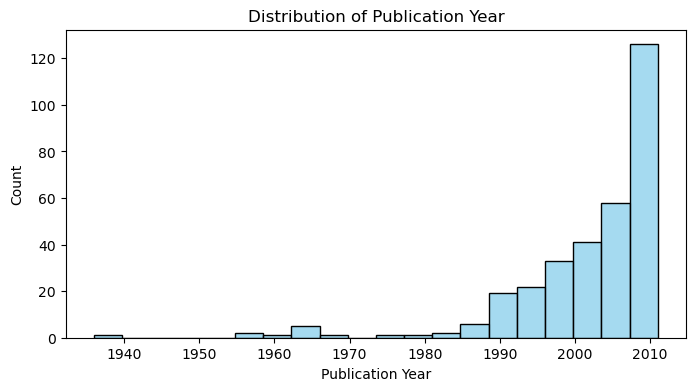

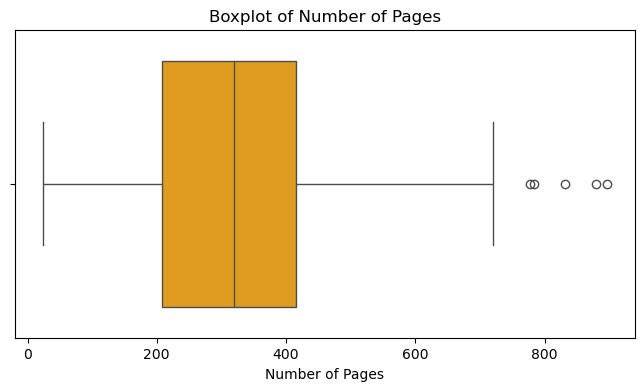

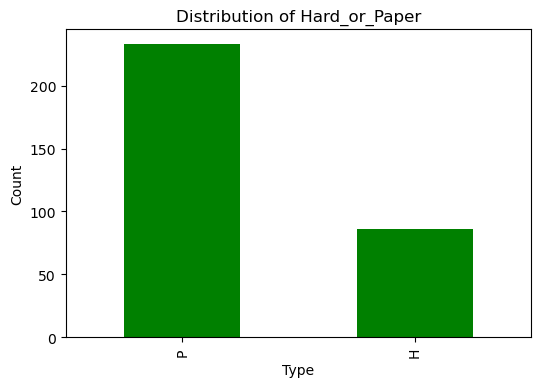

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
# Drop specified columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Drop rows with any NaN values
ab_reduced_noNaN = ab_reduced.dropna().copy()  # Create a copy to avoid warnings

# Convert specified columns to the correct data types using .loc
ab_reduced_noNaN.loc[:, "Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN.loc[:, "NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN.loc[:, "Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Display initial information
print("Initial Data Summary after Preprocessing:")
print(ab_reduced_noNaN.info())
print("\nSummary Statistics:")
print(ab_reduced_noNaN.describe())

import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of Publication Year
plt.figure(figsize=(8, 4))
sns.histplot(ab_reduced_noNaN["Pub year"], kde=False, bins=20, color="skyblue")
plt.title("Distribution of Publication Year")
plt.xlabel("Publication Year")
plt.ylabel("Count")
plt.show()

# Boxplot of Number of Pages
plt.figure(figsize=(8, 4))
sns.boxplot(x=ab_reduced_noNaN["NumPages"], color="orange")
plt.title("Boxplot of Number of Pages")
plt.xlabel("Number of Pages")
plt.show()

# Bar chart for Hard_or_Paper
plt.figure(figsize=(6, 4))
ab_reduced_noNaN["Hard_or_Paper"].value_counts().plot(kind="bar", color="green")
plt.title("Distribution of Hard_or_Paper")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


In [3]:
from sklearn.model_selection import train_test_split

# Perform the 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the sizes of the datasets
print(f"Training set size: {len(ab_reduced_noNaN_train)} observations")
print(f"Testing set size: {len(ab_reduced_noNaN_test)} observations")

Training set size: 255 observations
Testing set size: 64 observations


y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H'] is creating dummy variables for each category in the hard or paper column. The hardcovers are represented as 1 and the paperbacks are represented as 0. This makes the variable usable for a classification model

X = ab_reduced_noNaN[['List Price']] this sets the list price and only the list price column as the predictor varaible for the model.

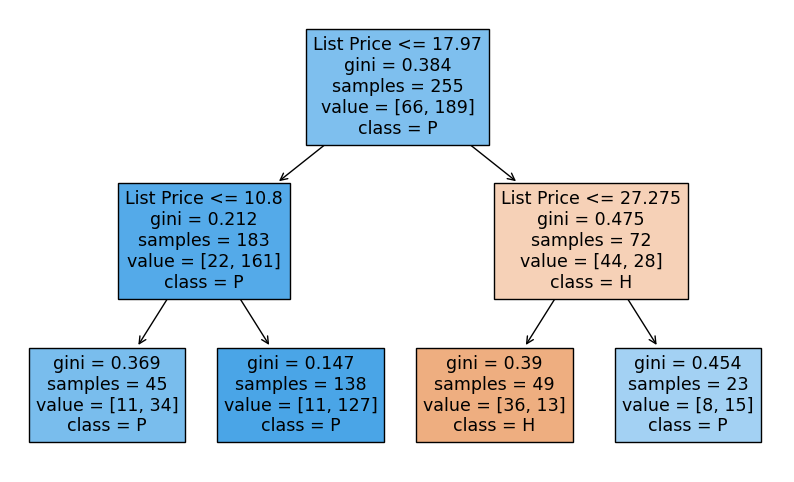

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Prepare the features and target
X_train = ab_reduced_noNaN_train[["List Price"]]
y_train = ab_reduced_noNaN_train["Hard_or_Paper"]

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Plot the tree structure
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=["List Price"], class_names=clf.classes_, filled=True)
plt.show()

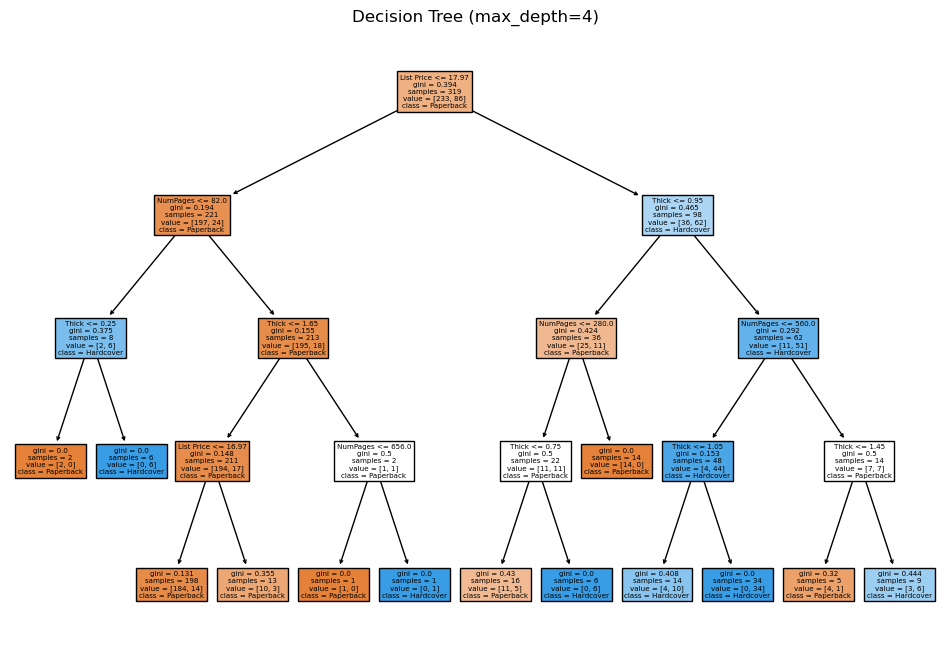

In [5]:
# Prepare the features and target
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Features
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Binary target

# Initialize the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the classifier
clf2.fit(X, y)

# Visualize the classification tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paperback', 'Hardcover'], filled=True)
plt.title("Decision Tree (max_depth=4)")
plt.show()


For the clf2 model, the decision is made at each node. The node tests a condition and then follows down towards the child node. Once a terminal node is reached it end it will then make a decision based of the majority.

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Convert 'H' to True and 'P' to False in y_pred_clf (for clf) and y_pred_clf2 (for clf2)
y_pred_clf = (y_pred_clf == 'H')  # Convert 'H' to True, 'P' to False
y_pred_clf2 = (y_pred_clf2 == 1)  # Convert 1 to True, 0 to False

# Compute confusion matrices for both models
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Function to calculate sensitivity, specificity, and accuracy
def compute_metrics(cm):
    # Extract values from confusion matrix: [True Negative, False Positive, False Negative, True Positive]
    tn, fp, fn, tp = cm.ravel()
    
    # Sensitivity (Recall or True Positive Rate)
    sensitivity = tp / (tp + fn)
    
    # Specificity (True Negative Rate)
    specificity = tn / (tn + fp)
    
    # Accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    return sensitivity, specificity, accuracy

# Calculate metrics for clf
sensitivity_clf, specificity_clf, accuracy_clf = compute_metrics(cm_clf)

# Calculate metrics for clf2
sensitivity_clf2, specificity_clf2, accuracy_clf2 = compute_metrics(cm_clf2)

# Print the results
print("Metrics for clf (List Price only, max_depth=2):")
print(f"Sensitivity: {sensitivity_clf:.4f}")
print(f"Specificity: {specificity_clf:.4f}")
print(f"Accuracy: {accuracy_clf:.4f}\n")

print("Metrics for clf2 (NumPages, Thick, List Price, max_depth=4):")
print(f"Sensitivity: {sensitivity_clf2:.4f}")
print(f"Specificity: {specificity_clf2:.4f}")
print(f"Accuracy: {accuracy_clf2:.4f}")



Metrics for clf (List Price only, max_depth=2):
Sensitivity: 0.7000
Specificity: 0.9091
Accuracy: 0.8438

Metrics for clf2 (NumPages, Thick, List Price, max_depth=4):
Sensitivity: 0.9000
Specificity: 0.9545
Accuracy: 0.9375


The differnce between these two confusion matrices is that the first model only uses list price which may or may not capture all the different patterns compared to the second model which has more predictors those being NumPages and Thick. These are better than the test set as it is able to generalize the model. The training set could be baised due to overfitting as well. 

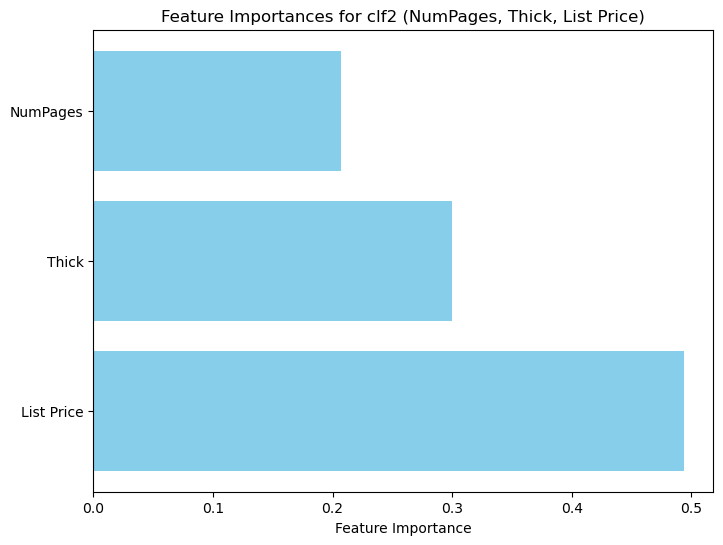

The most important predictor variable is: List Price


In [8]:
import matplotlib.pyplot as plt

# Get the feature importances from clf2
feature_importances = clf2.feature_importances_

# Get the feature names from clf2
feature_names = clf2.feature_names_in_

# Create a bar plot of feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances for clf2 (NumPages, Thick, List Price)')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

# Report which feature is the most important
most_important_feature = feature_names[feature_importances.argmax()]
print(f"The most important predictor variable is: {most_important_feature}")


In linear regression models, coefficients represent the estimated change in the dependent variable for a one unit change in a predictor variable. Where as for a decision tree feature importance indicate the contribution of each feature to teh model's predictive power based on how much they reduce impurity. This results in linear regression models having a direct relationship with the indictor and predictor variable and the feature importances does provide a direct relationship.

ChatGPT summary
https://chatgpt.com/share/673fdaf9-9c20-8002-8d76-e74d988e66e7

Setting up Decision Trees:

You prepared a dataset (ab_reduced_noNaN) and split it into training and testing sets.
Two decision tree classifiers were trained: clf (using only List Price) and clf2 (using NumPages, Thick, and List Price), with maximum depths of 2 and 4, respectively.
Evaluating Models:

You created confusion matrices for both models and calculated performance metrics (sensitivity, specificity, accuracy).
We fixed an error in the predictions by aligning the formats of true and predicted labels.
Feature Importances:

You visualized feature importances for clf2 and identified the most important predictor variable using .feature_importances_ and .feature_names_in_.
Key Insights:

Differences between interpreting coefficients in linear regression (direct relationships) versus feature importances in decision trees (relative contribution to impurity reduction) were discussed.